In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
dataset=pd.read_csv("nhanes_2015_2016.csv")

In [3]:
dataset.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [4]:
#DMDEDUC2 level of educational attainment (six possible values)
dataset.DMDEDUC2.value_counts()

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64

In [6]:
print(dataset.DMDEDUC2.value_counts().sum())
print(dataset.shape)

5474
(5735, 28)


In [9]:
pd.isnull(dataset.DMDEDUC2).sum()

261

In [11]:
#Create newcolumn replacing codes by their names
dataset["DMDEDUC2x"]=dataset.DMDEDUC2.replace({1: "<9", 
                                              2:"9-11",
                                              3: "HS/GED",
                                              4: "Some college/AA",
                                              7: "Refused",
                                              9: "Don't know"})

In [13]:
dataset.DMDEDUC2x.value_counts()

Some college/AA    1621
5.0                1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: DMDEDUC2x, dtype: int64

In [15]:
dataset["RIAGENDx"]=dataset.RIAGENDR.replace({1:"Male",2:"Female"})

In [16]:
#proportion of the samples 
x=dataset.DMDEDUC2x.value_counts()
x/x.sum()

Some college/AA    0.296127
5.0                0.249543
HS/GED             0.216661
<9                 0.119657
9-11               0.117464
Don't know         0.000548
Name: DMDEDUC2x, dtype: float64

In [18]:
#Missing values as another category. Assign all missing values to it 
#Using fillna
dataset["DMDEDUC2x"]=dataset.DMDEDUC2x.fillna("Missing")
x=dataset.DMDEDUC2x.value_counts()
x/x.sum()

Some college/AA    0.282650
5.0                0.238187
HS/GED             0.206800
<9                 0.114211
9-11               0.112119
Missing            0.045510
Don't know         0.000523
Name: DMDEDUC2x, dtype: float64

In [19]:
#Numerical summaries: describe df method
#Body weight variabel (BMXWT). Some values are missing
#Drop the missing values using dropna method
dataset.BMXWT.dropna().describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

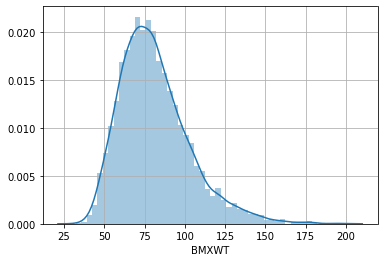

In [21]:
#Distribution of body weight 
sns.distplot(dataset.BMXWT.dropna())
plt.grid()

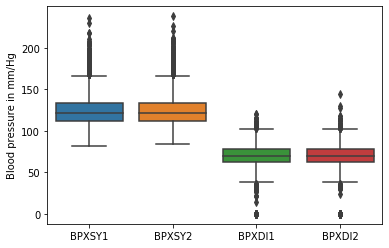

In [22]:
bp=sns.boxplot(data=dataset.loc[:, ["BPXSY1","BPXSY2","BPXDI1","BPXDI2"]])
_=bp.set_ylabel("Blood pressure in mm/Hg")

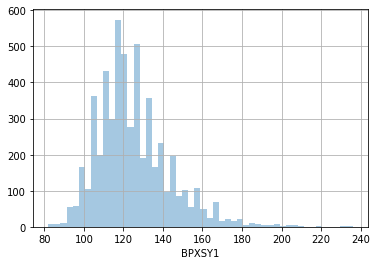

In [24]:
sns.distplot(dataset.BPXSY1.dropna(),kde= False)
plt.grid()